In [4]:
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt

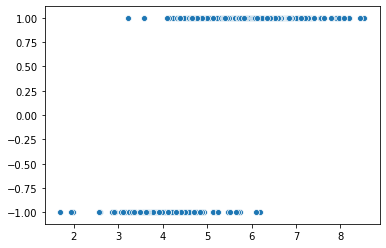

In [31]:
# sns.scatterplot(X_train.squeeze(), y_train)

In [120]:
class CatClassifier():
    """ Classifieur de chats 
    
    On distingue deux types de chat : type A (-1) et type B (+1).
    On classifie les chats en fonction de leur poids x à l'aide du classifier
    f_h défini telle que : f_h(x) = -1 si x <= h et +1 sinon.
    
    Parameters
    ----------
    
    Attributes
    ----------
    h_hat : float
            Valeur optimale de h.
    
    """
    h_hat = -np.Inf
    
    def __init__(self):
        pass
    
    def predict(self, X, h=None):
        """
        Prédit le type de chat pour les poids X et le paramètre h
        
        Parameters
        ----------
        X : array-like of shape (n_sample, n_features)
            Poids des chats
        
        h : float (default=h_hat)
            Paramètre de décision 
        
        Returns
        -------
        y : array-like of shape (n_samples,)
            Type des chats
        """
        if h is None:
            h = self.h_hat
        # TODO
        ## append
        '''
        y = np.array([])
        for x in np.nditer(X, order = 'C'): 
            if x <= h:
                y = np.append(y, -1)
            else:
                y = np.append(y, 1)  
        return y  
        '''
        ## pre allocate
        '''
        y = np.zeros(len(X))
        for i, x in enumerate(X):
        if x <= h:
            y[i] = -1
        else:
            y[i] = 1
        return y       
        '''
        ## return 
        '''
        return [-1 if x<=h h else 1 for x in X]
        '''

        ## sans boucle
        # t = time.time()
        return ((X>h)*2-1).flatten()
        # time = time.time() - t
    
    def err_emp(self, X, y, h=None):
        """
        Calcule l'erreur empirique de f_h sur l'ensemble (X,y).

        Parameters
        ----------
        X : array-like of shape (n_sample, n_features)
            Poids des chats
            
        y : array-like of shape (n_samples,)
            Type des chats
            
        h : float (default=h_hat)
            Paramètre de décision 

        Returns
        -------
        erreur : float
                 Erreur empirique

        """
        if h is None:
            h = self.h_hat
        
        # TODO
        y_pred = self.predict(X, h)
        TP = np.sum(y_pred!=y)
        N = len(y)
        return TP/N
    
    def fit(self, X, y):
        """
        Calcule la valeur optimale de h sur l'ensemble (X,y).
        L'attribut h_hat est mis à jour.'
        
        Parameters
        ----------
        X : array-like of shape (n_sample, n_features)
            Poids des chats
        
        y : array-like of shape (n_samples,)
            Type des chats
        
        Returns
        -------
        self : object
        """
        
        # TODO
        # method1: space = np.arange(np.min(silf.X_train), np.max(self.X_train), 0.01)
        # method2: the result change only when we pass a point
        
        # for h in space:
        err_min = 1
        for h in np.nditer(X):
            err = self.err_emp(X, y, h)
            if err < err_min:
                err_min = err
                self.h_hat = h
        return self
    
# nlog(n) (faire un trie, resolutino opitmal)

# K-Fold Cross Validation
# sublist
# masque: M=[true,true..]
# evaluer la performance de la methode
# k-fold: k by order
# shuffle split: random
# stratifiedKFord: same proportion of each class
# stratified shuffle split: random min each class
    def cv(self, X, y, K):
        l = len(y)
        unit = l//K
        Err = []
        for k in np.arange(K):
            s = k*unit
            mask = np.zeros(y.size, dtype=bool)
            if(k < K-1):
                mask[s: s+unit] = True
            else:
                mask[s:] = True
            x_valide = X[mask]
            y_valide = y[mask]
            x_train = X[~mask]
            y_train = y[~mask]
            self.fit(x_train, y_train)
            te = self.err_emp(x_valide, y_valide)
            Err.append(te)
        return np.mean(Err)
    
    def cv_sk(self, X, y, K):
        kf = KFold(n_splits=K)
        err = []
        for train, val in kf.split(X):
            self.fit(X[train], y[train])
            err.append(self.err_emp(X[val], y[val]))
        err_cv = np.mean(err)
        return err_cv

    def afficher_cross_vaidation1(self, X, y):
        err = []
        for k in range(2, 11):
            err.append(self.cv(X, y, k))
        plt.plot(range(1, 10), err)
        print(np.mean(err))
        plt.show()
        
    def afficher_cross_vaidation2(self, X, y):
        err = []
        for k in range(2, 11):
            err.append(self.cv_sk(X, y, k))
        plt.plot(range(1, 10), err)
        print(np.mean(err))
        plt.show()
    

    def err_theo(self, h, mu1=4, sigma1=1, mu2=6, sigma2=1, p1 =1/3):
        p2 = 1-p1
        return (1-norm.cdf(h, mu1, sigma1))*p1 + norm.cdf(h, mu2, sigma2)*p2
# if __name__ == "__main__":
#     X_train = np.loadtxt('/Users/yunfei/Desktop/GI05/SY32/td01/data/SY32_P20_TD01_data_X.csv', ndmin=2)
#     y_train = np.loadtxt('/Users/yunfei/Desktop/GI05/SY32/td01/data/SY32_P20_TD01_data_y.csv')
#     clf = CatClassifier()
#     print(clf.predict(X_train, 5))
#     print(clf.err_emp(X_train, y_train, 5)) #0.15333333333333332
#     print(clf.fit(X_train, y_train).h_hat) #4.62
#     clf.fit(X_train, y_train)
#     clf.h_hat
#     clf.err_emp(X_train, y_train) #0.12666666666666668
#     TE = clf.err_emp(X_train, y_train)
#     Taux d'erreur réel (pour h = 4,62) : 14,51
#     print(clf.err_theo(4.62))
#     print(clf.cv(X_train, y_train, 4))
#     clf.afficher_cross_vaidation1(X_train, y_train)
#     clf.afficher_cross_vaidation2(X_train, y_train)

## visualisation cross validation
https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py

# Classifieur multi-dimensionnel

In [26]:
class CatClassifierMultiDim():
    """ Classifieur de chats 
    
    On distingue deux types de chat : type A (-1) et type B (+1).
    On classifie les chats en fonction de leur poids et leur taille x à l'aide du classifier
    f_h défini telle que : f_h(x[d]) = z si x <= h et -z sinon.
    
    Parameters
    ----------
    
    Attributes
    ----------
    h_hat : float
            Valeur optimale de h.
    d : integer
        colonne de x choisi
    z : -1 ou +1
    
    """
    h_hat = -np.Inf
    d = 0
    z = -1
    def __init__(self):
        pass
    
    def predict(self, X, h=None, d=None, z=None):
        D = X_train.shape[1]
        if h is None:
            h = self.h_hat
        if d is None or d > D:
            d = self.d
        if z != 1 and z != -1:
            z = self.z
        return ((X[:,d]<=h)*2-1)*z
    
    def err_emp(self, X, y, h=None, d=None, z=None):
        if h is None:
            h = self.h_hat
        if d is None or d > X_train.shape[1]:
            d = self.d
        if z != 1 and z != -1:
            z = self.z
        y_pred = self.predict(X, h, d ,z)
        TP = np.sum(y_pred!=y)
        N = len(y)
        return TP/N
    
    def fit(self, X, y):
        err_min = 1
        for d in np.arange(X_train.shape[1]):
            for z in [-1, 1]:
                for h in np.nditer(X[:,d]):
                    err = self.err_emp(X, y, h, d, z)
                    if err < err_min:
                        err_min = err
                        self.h_hat = h
                        self.d = d
                        self.z = z
        return self

    def cv(self, X, y, K):
        l = len(y)
        unit = l//K
        Err = []
        for k in np.arange(K):
            s = k*unit
            mask = np.zeros(y.size, dtype=bool)
            if(k < K-1):
                mask[s: s+unit] = True
            else:
                mask[s:] = True
            x_valide = X[mask]
            y_valide = y[mask]
            x_train = X[~mask]
            y_train = y[~mask]
            self.fit(x_train, y_train)
            te = self.err_emp(x_valide, y_valide)
            Err.append(te)
        return np.mean(Err)
    
    def cv_sk(self, X, y, K):
        kf = KFold(n_splits=K)
        err = []
        for train, val in kf.split(X):
            self.fit(X[train], y[train])
            err.append(self.err_emp(X[val], y[val]))
        err_cv = np.mean(err)
        return err_cv

    def afficher_cross_vaidation1(self, X, y):
        err = []
        for k in range(2, 11):
            err.append(self.cv(X, y, k))
        plt.plot(range(1, 10), err)
        print(np.mean(err))
        plt.show()
        
    def afficher_cross_vaidation2(self, X, y):
        err = []
        for k in range(2, 11):
            err.append(self.cv_sk(X, y, k))
        plt.plot(range(1, 10), err)
        print(np.mean(err))
        plt.show()                

array(46.679)

1

-1

In [49]:
class CatClassifierBoost(CatClassifierMultiDim):
    def __init__(X, y, K):
        self.p = np.zeros(y.size)
        self.p = 1/y.size
        self.K = K
        self.alpha = np.zeros(K)
        self.h_hat = np.zeros(K)
        self.d = np.zeros(K)
        self.z = n--p.zeros(K)
        for i in range(self.K):
            clf.fit_k(X, y, i)

    def err_emp(self, X, p, y, h, d, z):
        if h is None:
            h = self.h_hat
        if d is None or d > X_train.shape[1]:
            d = self.d
        if z != 1 and z != -1:
            z = self.z
        y_pred = self.predict(X, p, h, d ,z)
        return np.sum((y_pred!=y)*p)
       
    def fit_k(self, X, y, k, p):
        if p is None:
            p = self.p
        err_min = 1
        for d in np.arange(X_train.shape[1]):
            for z in [-1, 1]:
                for h in np.nditer(X[:,d]):
                    err = self.err_emp(X, p, y, h, d, z)
                    if err < err_min:
                        err_min = err
                        self.h_hat[k] = h
                        self.d[k] = d
                        self.z[k] = z
                        self.alpha[k] = (1/2)*np.log((1-err_min)/err_min)
                        self.p = self.p * np.log(-alpha[k]*y*predict(X))/(2*np.sqrt(err_min*(1-err_min)))
    def Adaboost(self, X):
        s = 0
        for h, d, z, i in zip(self.h_hat, self.d, self.z, self.K):
            s = s + self.alpha[i]*self.predict(X, h, d, z)
        if s > 0:
            return 1
        else:
            return -1
        
if __name__ == "__main__":
    X_train = np.loadtxt('/Users/yunfei/Desktop/GI05/SY32/td02/data/SY32_P20_TD02_data_X_train.csv', ndmin=2)
    y_train = np.loadtxt('/Users/yunfei/Desktop/GI05/SY32/td02/data/SY32_P20_TD02_data_y_train.csv')
    X_test = np.loadtxt('/Users/yunfei/Desktop/GI05/SY32/td02/data/SY32_P20_TD02_data_X_test.csv', ndmin=2)
    clf = CatClassifierBoost(X_train, y_train,10)
    y_hat = clf.Adaboost(X_test)
#     clf.fit(X_train, y_train)
#     clf.h_hat
#     clf.d
#     clf.z    

TypeError: __init__() takes 3 positional arguments but 4 were given